<a href="https://colab.research.google.com/github/Maucho6340/Telecom_X_LATAM_Predict/blob/main/Challenge_predict_evasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> CHALLENGE TELECOM X:
**Análisis de evasión de clientes Parte-2**

## **MISIÓN**



Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **OBJETIVOS DEL DESAFÍO**



- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## **DESARROLLO**

### **Verificar versiones de bibliotecas**

In [3]:
import pandas, numpy, matplotlib, seaborn, sklearn, scipy #scipy
print('Versión de Pandas: %s' % pandas.__version__)
print('Versión de Numpy: %s' % numpy.__version__)
print('Versión de Matplotlib: %s' % matplotlib.__version__)
print('Versión de Seaborn: %s' % seaborn.__version__)
print('Versión de Sklearn: %s' % sklearn.__version__)
print('Versión de Scipy: %s' % scipy.__version__)

Versión de Pandas: 2.2.2
Versión de Numpy: 2.0.2
Versión de Matplotlib: 3.10.0
Versión de Seaborn: 0.13.2
Versión de Sklearn: 1.6.1
Versión de Scipy: 1.16.1


### **Cargar archivo**

In [4]:
import pandas as pd

# Cargar archivo CSV
df_final = pd.read_csv("/content/df_predict_churn_2.csv")

# Vista rápida de los primeros registros
df_final.head(5)

,ID_Cliente,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Facturacion_Mensual,account.Charges.Total,Cuentas_Diarias,Churn_bin,Churn_num
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fibra Óptica,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fibra Óptica,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fibra Óptica,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0,1.0


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

En este caso, como el objetivo es predecir si un cliente va a cancelar o no el servicio, estamos trabajando con una variable categórica (churn: sí o no). Por eso, los modelos adecuados son los de clasificación, como DecisionTreeClassifier o KNeighborsClassifier

In [6]:
df_final.sample(5)

,ID_Cliente,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Facturacion_Mensual,account.Charges.Total,Cuentas_Diarias,Churn_bin,Churn_num
6487,8914-RBTSB,Yes,Male,0,Yes,No,31,Yes,Yes,Fibra Óptica,...,Yes,No,Month-to-month,No,Electronic check,93.80,3019.50,3.126667,1.0,1.0
5902,8064-RAVOH,No,Male,0,No,Yes,1,Yes,No,DSL,...,No,No,Month-to-month,Yes,Electronic check,49.85,49.85,1.661667,0.0,0.0
2189,3066-RRJIO,Yes,Female,0,No,No,1,Yes,No,Fibra Óptica,...,No,No,Month-to-month,Yes,Mailed check,69.95,69.95,2.331667,1.0,1.0
773,1095-WGNGG,No,Female,0,Yes,No,61,Yes,Yes,Fibra Óptica,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.05,5971.25,3.368333,0.0,0.0
4148,5687-DKDTV,Yes,Female,0,No,No,4,Yes,No,Sin Servicio,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,77.50,0.678333,1.0,1.0


### <font color='blue'>**1.- Preparar los datos para el modelado (tratamiento, codificación, normalización)**.

##### **Tratamiento de valores nulos**

In [7]:
# Imputar con mediana en 'account.Charges.Total' — versión segura
df_final['account.Charges.Total'] = df_final['account.Charges.Total'].fillna(df_final['account.Charges.Total'].median())

# Eliminar filas sin datos en la variable objetivo
df_final.dropna(subset=['Churn_bin', 'Churn_num'], inplace=True)

##### **Codificación de Variables Categórica**

In [8]:
# Eliminar columna de ID si no es predictiva
df_final.drop(columns=['ID_Cliente'], inplace=True)

# Codificación con pd.get_dummies
columnas_categoricas = df_final.select_dtypes(include='object').columns

df_final = pd.get_dummies(df_final, columns=columnas_categoricas, drop_first=True)

##### **Verificación final del DataFram**

In [9]:
# Confirmar que no quedan datos nulos ni columnas tipo object
print(df_final.isnull().sum())
print(df_final.dtypes)

customer.SeniorCitizen                           0
customer.tenure                                  0
Facturacion_Mensual                              0
account.Charges.Total                            0
Cuentas_Diarias                                  0
Churn_bin                                        0
Churn_num                                        0
Churn_Yes                                        0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fibra Óptica            0
internet.InternetService_Sin Servicio            0
internet.OnlineSecurity_No internet service      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_No internet service        0
internet.OnlineBackup_Yes      

### <font color='blue'>**2.- Realizar análisis de correlación y selección de variables**.

##### **Análisis de correlación numérica**

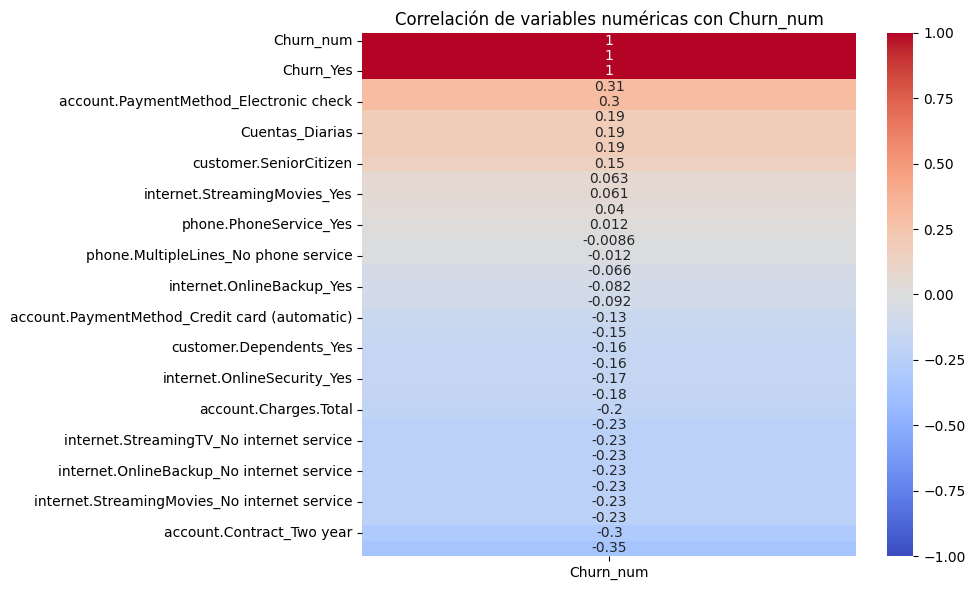

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación de variables numéricas
correlaciones = df_final.corr(numeric_only=True)

# Visualizar correlación con la variable objetivo
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones[['Churn_num']].sort_values(by='Churn_num', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación de variables numéricas con Churn_num")
plt.tight_layout()
plt.show()

##### **Análisis de Importancia para Variables Booleana**

/tmp/ipython-input-1220061550.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')


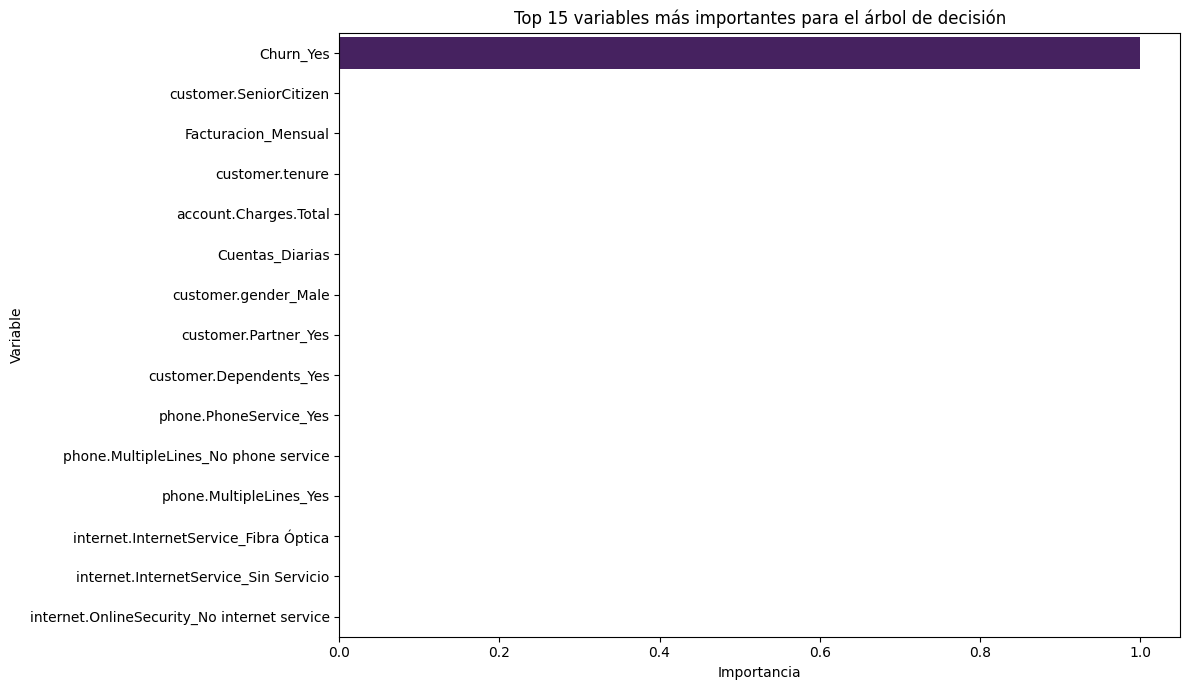

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Definimos variables predictoras y target
X = df_final.drop(columns=['Churn_bin', 'Churn_num'])
y = df_final['Churn_bin']  # o 'Churn_num' si preferimos continuo

# Entrenar modelo rápido para evaluar importancia
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X, y)

# Obtener importancias
importancias = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualización
plt.figure(figsize=(12, 7))
sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')
plt.title("Top 15 variables más importantes para el árbol de decisión")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

/tmp/ipython-input-943410578.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')


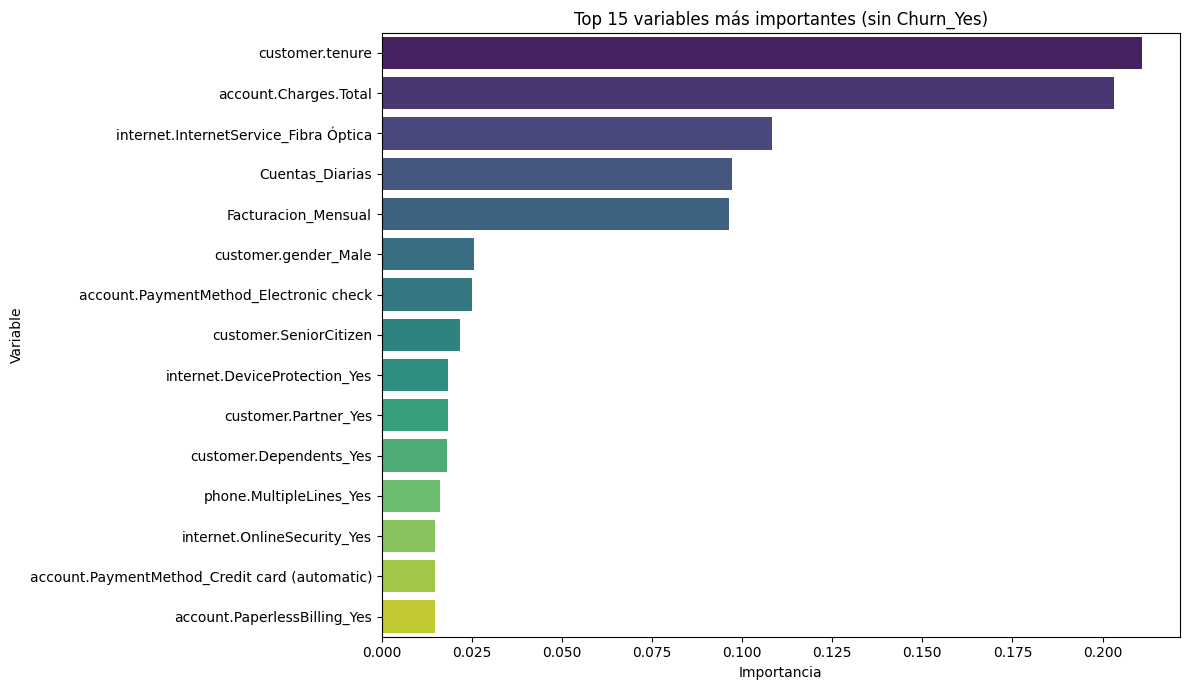

In [12]:
X = df_final.drop(columns=['Churn_bin', 'Churn_num', 'Churn_Yes'])  # excluimos el target y su duplicado
y = df_final['Churn_bin']  # o 'Churn_num' según tu criterio

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X, y)

importancias = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualizamos nuevamente
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')
plt.title("Top 15 variables más importantes (sin Churn_Yes)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Variables Predictivas Seleccionadas para el Modelo **DecisionTreeClassifier**

| Variable                                  | Descripción y Justificación |
|--------------------------------------------|------------------------------|
| `customer.tenure`                          | Antigüedad del cliente; menor permanencia se asocia a mayor churn. |
| `account.Charges.Total`                    | Total facturado; refleja exposición financiera acumulada. |
| `internet.InternetService_Fibra Óptica`    | Este tipo de servicio está correlacionado con mayor abandono. |
| `Cuentas_Diarias`                          | Actividad operativa diaria; puede influir en la permanencia. |
| `Facturacion_Mensual`                      | Costo mensual del servicio; niveles altos pueden generar abandono. |
| `customer.SeniorCitizen`                   | Grupo demográfico con patrones de churn distintos. |
| `account.PaymentMethod_Electronic check`   | Método de pago vinculado a mayor volatilidad de permanencia. |
| `account.Contract_Two year`                | Contrato largo suele estar ligado a menor churn. |
| `internet.OnlineSecurity_Yes`              | Servicios adicionales pueden aumentar la percepción de valor. |
| `phone.MultipleLines_Yes`                  | Presencia de líneas múltiples podría asociarse a mayor complejidad o costos. |

##### **Análisis de Multicolinealidad con VIF**

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Usamos df_final directamente con las variables seleccionadas
X = df_final[['customer.tenure', 'account.Charges.Total', 'Cuentas_Diarias', 'Facturacion_Mensual']]
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

print(vif_data)

                Variable       VIF
0        customer.tenure  5.769597
1  account.Charges.Total  9.395018
2        Cuentas_Diarias       inf
3    Facturacion_Mensual       inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


##### **Visualización de correlaciones cruzadas**

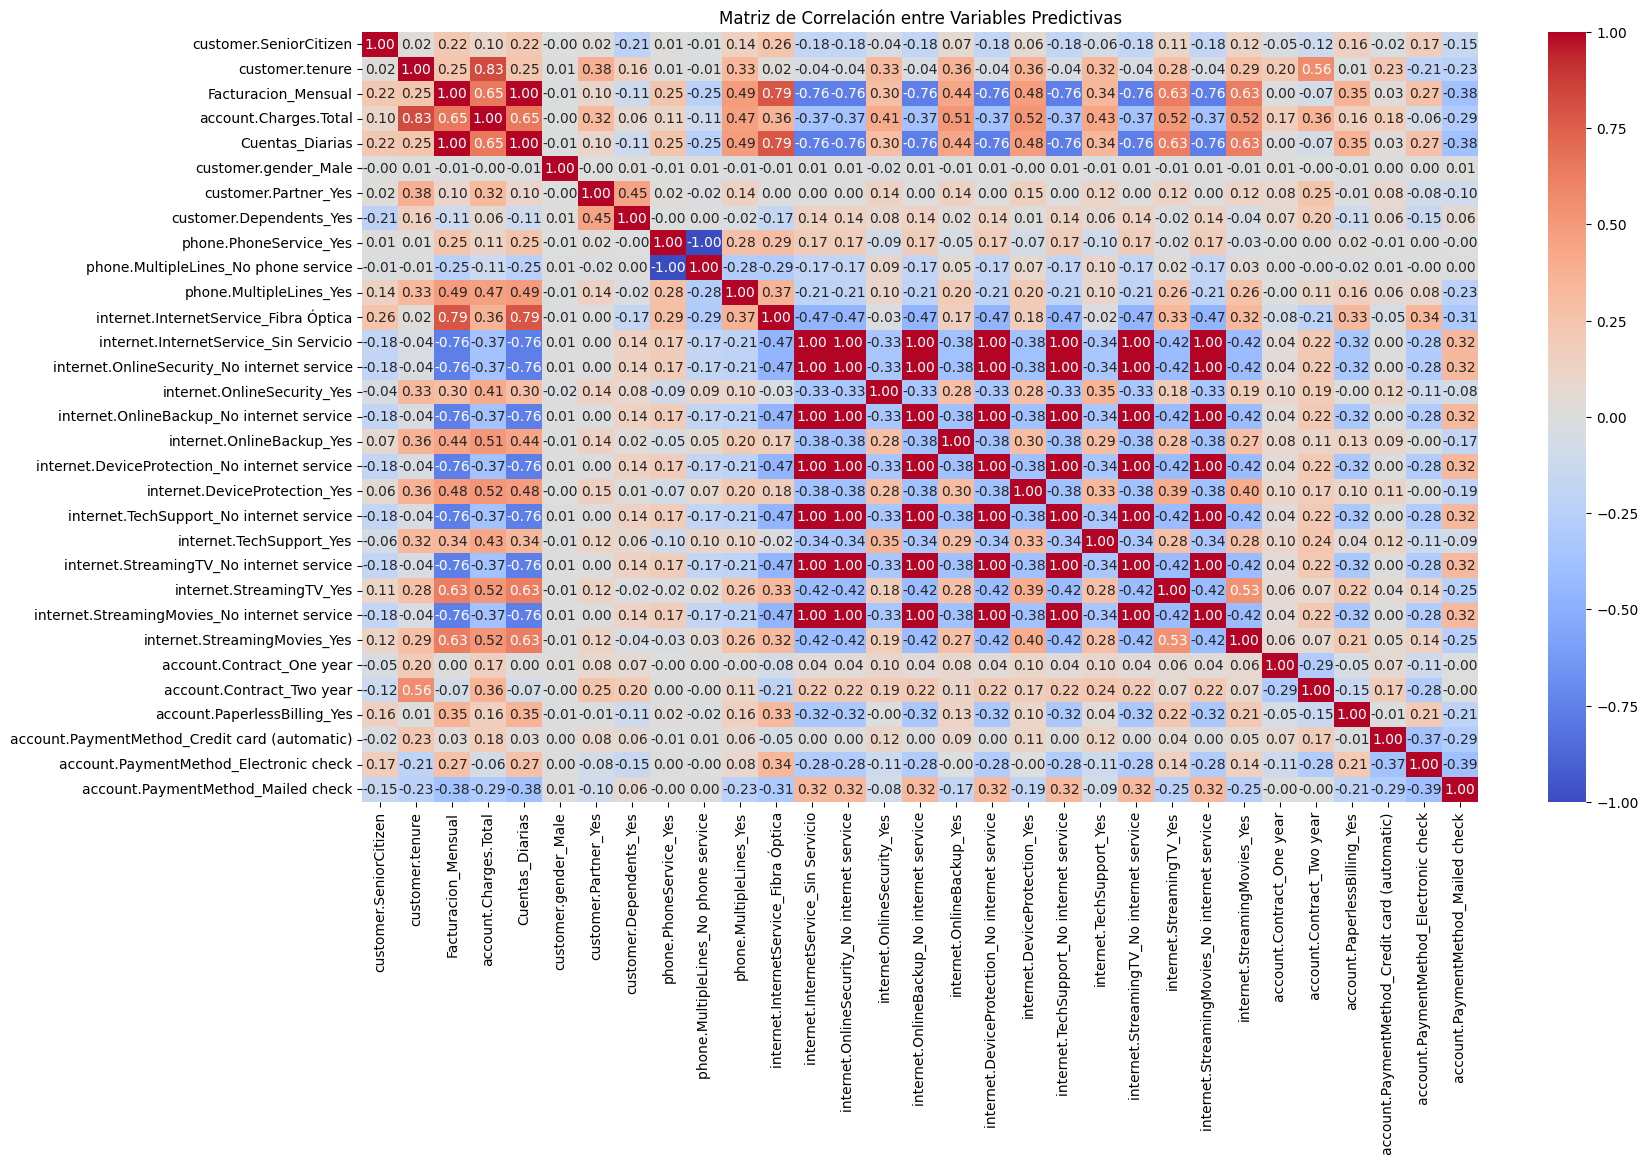

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Predictivas")
plt.show()

##### **Comparación con otras técnicas de selección automática**

<u>Recursive Feature Elimination (RFE)</u>

In [18]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Variables seleccionadas por RFE:", selected_features.tolist())

Variables seleccionadas por RFE: ['customer.tenure', 'Facturacion_Mensual', 'account.Charges.Total', 'Cuentas_Diarias', 'internet.InternetService_Fibra Óptica']


<u>SelectFromModel</u>

In [19]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model)
sfm.fit(X, y)

selected_features_sfm = X.columns[sfm.get_support()]
print("Variables seleccionadas por SelectFromModel:", selected_features_sfm.tolist())

Variables seleccionadas por SelectFromModel: ['customer.tenure', 'Facturacion_Mensual', 'account.Charges.Total', 'Cuentas_Diarias', 'internet.InternetService_Fibra Óptica']


Etapa 2: Análisis de Correlación y Selección de Variables
En esta etapa se realizó un análisis exhaustivo para identificar las variables más relevantes en la predicción de cancelación de clientes (Churn). El objetivo fue reducir la dimensionalidad del conjunto de datos, eliminar redundancias y preparar un conjunto robusto de variables predictoras para el modelado.
🔍 Análisis de Correlación
Se aplicaron técnicas de correlación cruzada entre variables numéricas, lo que permitió identificar relaciones lineales fuertes entre algunas variables, especialmente aquellas relacionadas con facturación y uso diario. Se observó una alta correlación entre:
- Facturacion_Mensual y Cuentas_Diarias
- account.Charges.Total y ambas anteriores
Esto sugiere redundancia informativa que podría afectar la estabilidad de algunos modelos.
📈 Análisis de Multicolinealidad (VIF)
Se calculó el Factor de Inflación de Varianza (VIF) para las principales variables numéricas. Los resultados indicaron:
- customer.tenure: VIF moderado (5.77), aceptable
- account.Charges.Total: VIF alto (9.40), requiere monitoreo
- Facturacion_Mensual y Cuentas_Diarias: VIF infinito, indicando multicolinealidad extrema
Este hallazgo refuerza la necesidad de considerar la eliminación de una de estas dos variables en etapas posteriores.
🧠 Técnicas de Selección de Variables
Se aplicaron tres enfoques complementarios:
- Importancia de variables con árbol de decisión: permitió visualizar las 15 variables más influyentes en la predicción de churn.
- RFE (Recursive Feature Elimination): seleccionó cinco variables clave, priorizando rendimiento predictivo.
- SelectFromModel: coincidió con RFE, validando la consistencia de la selección.
Las variables seleccionadas por ambas técnicas fueron:
['customer.tenure',
 'Facturacion_Mensual',
 'account.Charges.Total',
 'Cuentas_Diarias',
 'internet.InternetService_Fibra Óptica']

 ✅ Conclusión de la Etapa
Se consolidó un conjunto de cinco variables altamente relevantes para el modelado, aunque se detectó multicolinealidad entre dos de ellas. Esta situación será monitoreada en la siguiente etapa, donde se evaluará su impacto en el rendimiento de los modelos. La selección fue validada por múltiples técnicas, lo que aporta solidez al proceso de preparación.


### <font color='blue'>**3.- Entrenar dos o más modelos de clasificación**.